# Minimum Spanning Tree

In [1]:
import networkx as nx
import dynetx as dn
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from sklearn.metrics import r2_score
from conformity import attribute_conformity
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from PIL import Image
from itertools import count
%matplotlib inline

In [2]:
list_graph = np.load('data\\list_graph.npy',allow_pickle='TRUE').item()

In [3]:
for element in list(list_graph.keys()):
    list_graph[element] = nx.minimum_spanning_tree(list_graph[element])

In [4]:
def draw_graph(G, title):
    groups = set(nx.get_node_attributes(G,'label').values())
    mapping = dict(zip(sorted(groups),count()))
    val_map  = {n : mapping[G.nodes[n]['label']] for n in G.nodes()}
    ColorLegend = {sector : value for sector, value in zip(np.unique(np.array(list(nx.get_node_attributes(G,'label').values()))),
                                                      np.unique(np.array(list(val_map.values()))))}
    values = [val_map.get(node, 0) for node in G.nodes()]
    # Color mapping
    jet = cm = plt.get_cmap('jet')
    cNorm  = colors.Normalize(vmin=0, vmax=max(values))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    # Using a figure to use it as a parameter when calling nx.draw_networkx
    f = plt.figure(1, figsize=(10, 8))
    ax = f.add_subplot(1,1,1)
    for label in ColorLegend:
        ax.plot([0],[0],color=scalarMap.to_rgba(ColorLegend[label]),label=label)
    pos = nx.spring_layout(G, seed=7)
    ec = nx.draw_networkx_edges(G, pos, width = 1, edge_color='blue')
    nc = nx.draw_networkx_nodes(G, pos, edgecolors = 'black', node_color = values,
                                node_size=50, cmap = plt.cm.jet)
    plt.legend()
    f.tight_layout()
    f.set_facecolor('w')
    plt.axis('off')
    plt.title(f"{title}")
    return f 

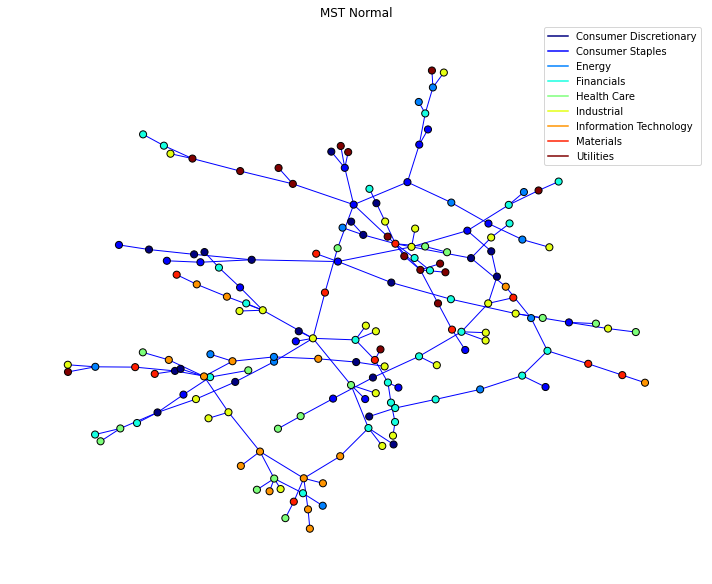

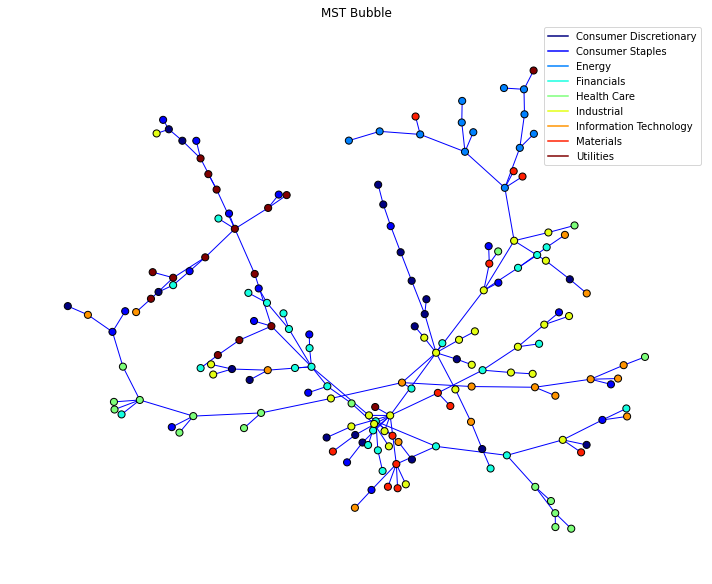

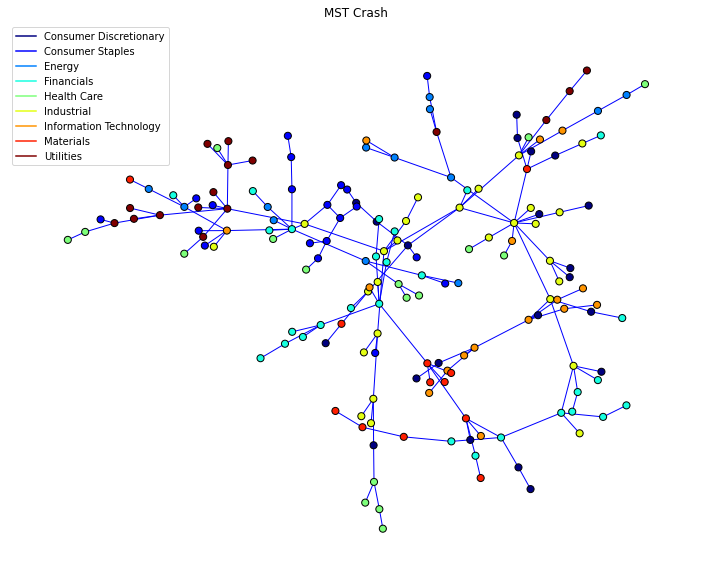

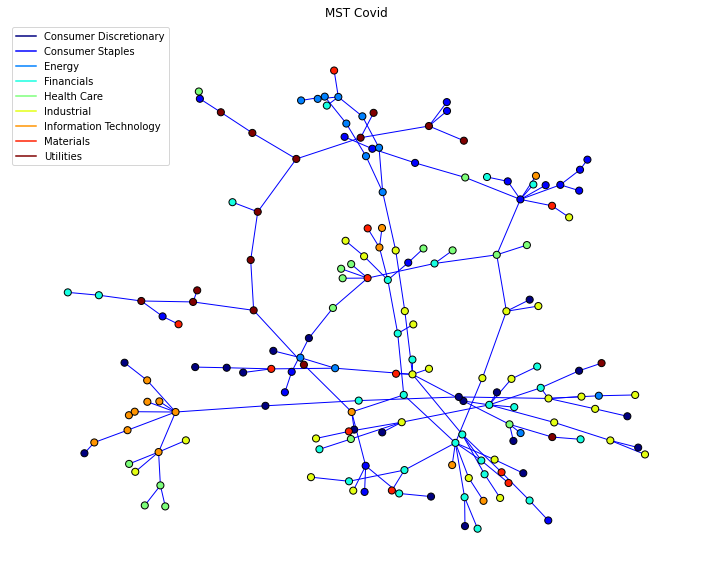

In [5]:
name_title = ['MST Normal', 'MST Bubble', 'MST Crash', 'MST Covid']
for index in range(0,4):
    f = draw_graph(list_graph[index], title = name_title[index])
    plt.savefig(f"plots\\{name_title[index]}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Analysis MST

In [6]:
print(f'Number edges Normal = {len(list_graph[0].edges())} \t Number edges Bubble = {len(list_graph[1].edges())}' 
      f'\t Number edges Crash: {len(list_graph[2].edges())} \t Number edges Covid = {len(list_graph[3].edges())}')

Number edges Normal = 167 	 Number edges Bubble = 169	 Number edges Crash: 169 	 Number edges Covid = 167


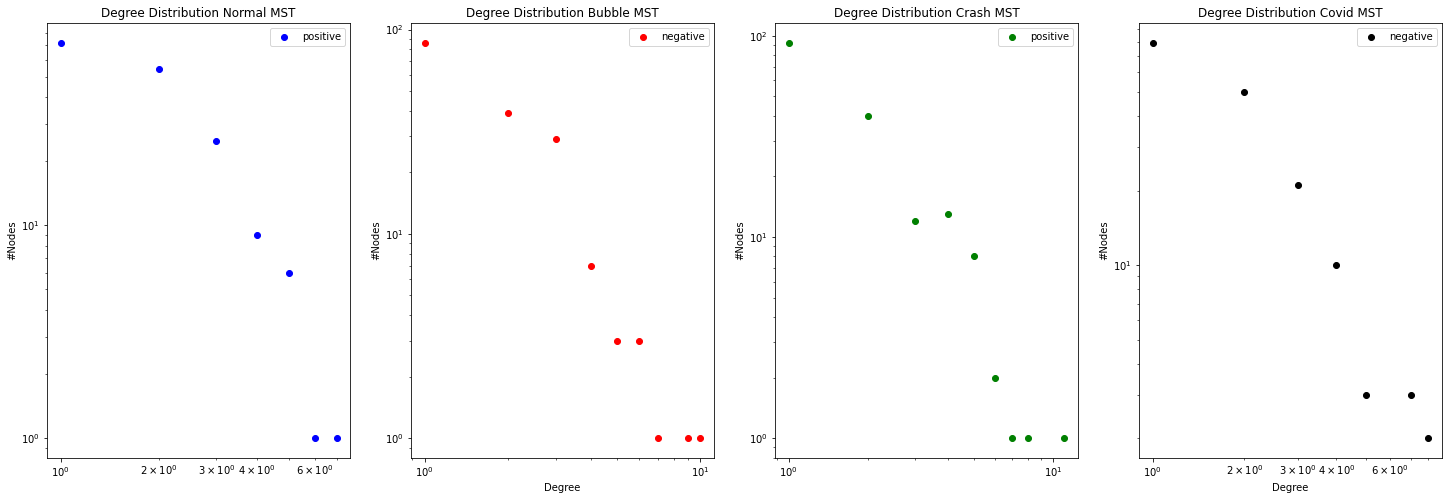

In [7]:
hist_normal = nx.degree_histogram(list_graph[0])
hist_bubble = nx.degree_histogram(list_graph[1])
hist_crash = nx.degree_histogram(list_graph[2])
hist_covid = nx.degree_histogram(list_graph[3])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(25, 8))
ax1.plot(range(0, len(hist_normal)),hist_normal, linestyle=" ", label = 'positive', marker = 'o', color = 'blue')
ax1.set_title('Degree Distribution Normal MST')
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('#Nodes')
ax2.plot(range(0, len(hist_bubble)),hist_bubble, linestyle=" ", label = 'negative', marker = 'o', color = 'red')
ax2.set_title('Degree Distribution Bubble MST')
ax2.set_xlabel('Degree')
ax2.set_ylabel('#Nodes')
ax2.legend()
ax2.loglog()
ax3.plot(range(0, len(hist_crash)),hist_crash, linestyle=" ", label = 'positive', marker = 'o', color = 'green')
ax3.set_title('Degree Distribution Crash MST')
ax3.legend()
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel('#Nodes')
ax4.plot(range(0, len(hist_covid)),hist_covid, linestyle=" ", label = 'negative', marker = 'o', color = 'black')
ax4.set_title('Degree Distribution Covid MST')
ax4.set_xlabel('Degree')
ax4.set_ylabel('#Nodes')
ax4.legend()
ax4.loglog()
plt.savefig("plots\\degree_distribution_MST.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [8]:
def fit_power_law_linear(x, y, init):
    opt_parms, parm_cov =curve_fit(powerlaw_fun_linear, x, y, init,maxfev=1000)
    A, B  = opt_parms
    return A, B, parm_cov
def powerlaw_fun_linear(x, A, B):
    return A +B*x

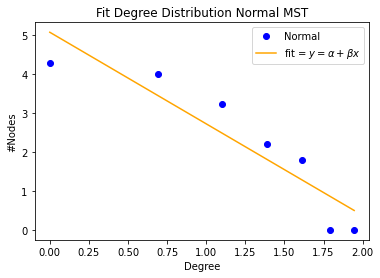

A: 5.07+-0.62, 	 B: -2.35+-0.45, 	 R2: 0.85, 	 chi: 0.914034114514831


In [9]:
# Actual parameters
ydata = np.array(hist_normal)
ydata = np.log(ydata[ydata >0])
xdata = np.array(range(0, len(ydata)+1))
xdata = np.log(xdata[xdata >0])
init = (100,1.5)
A, B, parm_cov = fit_power_law_linear(xdata, ydata, init)
SE = np.sqrt(np.diag(parm_cov))
x_fit = np.linspace(min(xdata),max(xdata),10000)
fit_y = powerlaw_fun_linear(xdata, A, B )
y_fit = powerlaw_fun_linear(x_fit, A, B)
plt.plot(figsize=(20, 8))
plt.plot(xdata, ydata, marker = 'o', color = 'blue', label='Normal', linestyle=" ")
plt.plot(x_fit, y_fit, '-', label=r'fit = $y = \alpha + \beta x$'
         , color ='orange')
plt.legend()
plt.title('Fit Degree Distribution Normal MST')
plt.ylabel('#Nodes')
plt.xlabel('Degree')
plt.savefig("plots\\degree_distribution_normal_MST.pdf", format="pdf", bbox_inches="tight")
plt.show()
R2 = r2_score(ydata,fit_y)
chisq = chisquare(f_obs = ydata, f_exp=fit_y)
print(f'A: {A:.2f}+-{SE[0]:.2f}, \t B: {B:.2f}+-{SE[1]:.2f}, \t R2: {R2:.2f}, \t chi: {chisq[1]:}')

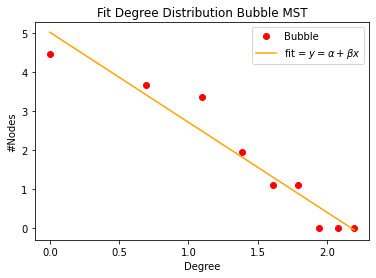

A: 5.02+-0.37, 	 B: -2.31+-0.23, 	 R2: 0.93, 	 chi: 0.996807653738542


In [10]:
# Actual parameters
ydata = np.array(hist_bubble)
ydata = np.log(ydata[ydata >0])
xdata = np.array(range(0, len(ydata)+1))
xdata = np.log(xdata[xdata >0])
init = (100,1.5)
A, B, parm_cov = fit_power_law_linear(xdata, ydata, init)
SE = np.sqrt(np.diag(parm_cov))
x_fit = np.linspace(min(xdata),max(xdata),10000)
fit_y = powerlaw_fun_linear(xdata, A, B )
y_fit = powerlaw_fun_linear(x_fit, A, B)
plt.plot(figsize=(20, 8))
plt.plot(xdata, ydata, marker = 'o', color = 'red', label='Bubble', linestyle=" ")
plt.plot(x_fit, y_fit, '-', label=r'fit = $y = \alpha + \beta x$'
         , color ='orange')
plt.legend()
plt.title('Fit Degree Distribution Bubble MST')
plt.ylabel('#Nodes')
plt.xlabel('Degree')
plt.savefig("plots\\degree_distribution_bubble_MST.pdf", format="pdf", bbox_inches="tight")
plt.show()
R2 = r2_score(ydata,fit_y)
chisq = chisquare(f_obs = ydata, f_exp=fit_y)
print(f'A: {A:.2f}+-{SE[0]:.2f}, \t B: {B:.2f}+-{SE[1]:.2f}, \t R2: {R2:.2f}, \t chi: {chisq[1]:}')

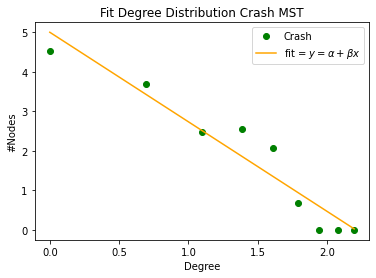

A: 5.00+-0.39, 	 B: -2.27+-0.25, 	 R2: 0.92, 	 chi: 0.9889582654146281


In [11]:
# Actual parameters
ydata = np.array(hist_crash)
ydata = np.log(ydata[ydata >0])
xdata = np.array(range(0, len(ydata)+1))
xdata = np.log(xdata[xdata >0])
init = (100,1.5)
A, B, parm_cov = fit_power_law_linear(xdata, ydata, init)
SE = np.sqrt(np.diag(parm_cov))
x_fit = np.linspace(min(xdata),max(xdata),10000)
fit_y = powerlaw_fun_linear(xdata, A, B )
y_fit = powerlaw_fun_linear(x_fit, A, B)
plt.plot(figsize=(20, 8))
plt.plot(xdata, ydata, marker = 'o', color = 'green', label='Crash', linestyle=" ")
plt.plot(x_fit, y_fit, '-', label=r'fit = $y = \alpha + \beta x$'
         , color ='orange')
plt.legend()
plt.title('Fit Degree Distribution Crash MST')
plt.ylabel('#Nodes')
plt.xlabel('Degree')
plt.savefig("plots\\degree_distribution_crash_MST.pdf", format="pdf", bbox_inches="tight")
plt.show()
R2 = r2_score(ydata,fit_y)
chisq = chisquare(f_obs = ydata, f_exp=fit_y)
print(f'A: {A:.2f}+-{SE[0]:.2f}, \t B: {B:.2f}+-{SE[1]:.2f}, \t R2: {R2:.2f}, \t chi: {chisq[1]:}')

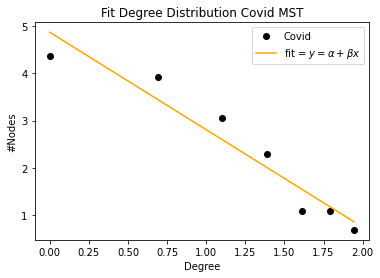

A: 4.86+-0.36, 	 B: -2.06+-0.27, 	 R2: 0.92, 	 chi: 0.9988179684496643


In [12]:
# Actual parameters
ydata = np.array(hist_covid)
ydata = np.log(ydata[ydata >0])
xdata = np.array(range(0, len(ydata)+1))
xdata = np.log(xdata[xdata >0])
init = (100,1.5)
A, B, parm_cov = fit_power_law_linear(xdata, ydata, init)
SE = np.sqrt(np.diag(parm_cov))
x_fit = np.linspace(min(xdata),max(xdata),10000)
fit_y = powerlaw_fun_linear(xdata, A, B )
y_fit = powerlaw_fun_linear(x_fit, A, B)
plt.plot(figsize=(20, 8))
plt.plot(xdata, ydata, marker = 'o', color = 'black', label='Covid', linestyle=" ")
plt.plot(x_fit, y_fit, '-', label=r'fit = $y = \alpha + \beta x$'
         , color ='orange')
plt.legend()
plt.title('Fit Degree Distribution Covid MST')
plt.ylabel('#Nodes')
plt.xlabel('Degree')
plt.savefig("plots\\degree_distribution_covid_MST.pdf", format="pdf", bbox_inches="tight")
plt.show()
R2 = r2_score(ydata,fit_y)
chisq = chisquare(f_obs = ydata, f_exp=fit_y)
print(f'A: {A:.2f}+-{SE[0]:.2f}, \t B: {B:.2f}+-{SE[1]:.2f}, \t R2: {R2:.2f}, \t chi: {chisq[1]:}')

In [13]:
def draw_net(G, measures, measure_name):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(15,15))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(), edgecolors = 'black')
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.1, linscale=10, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

### Closeness Centrality

In [14]:
closeness_normal = nx.closeness_centrality(list_graph[0])
closeness_bubble = nx.closeness_centrality(list_graph[1])
closeness_crash = nx.closeness_centrality(list_graph[2])
closeness_covid = nx.closeness_centrality(list_graph[3])
closeness_normal = {k: v for k, v in sorted(closeness_normal.items(), key=lambda item: item[1],reverse=True)}
closeness_bubble= {k: v for k, v in sorted(closeness_bubble.items(), key=lambda item: item[1],reverse=True)}
closeness_crash = {k: v for k, v in sorted(closeness_crash.items(), key=lambda item: item[1],reverse=True)}
closeness_covid = {k: v for k, v in sorted(closeness_covid.items(), key=lambda item: item[1],reverse=True)}

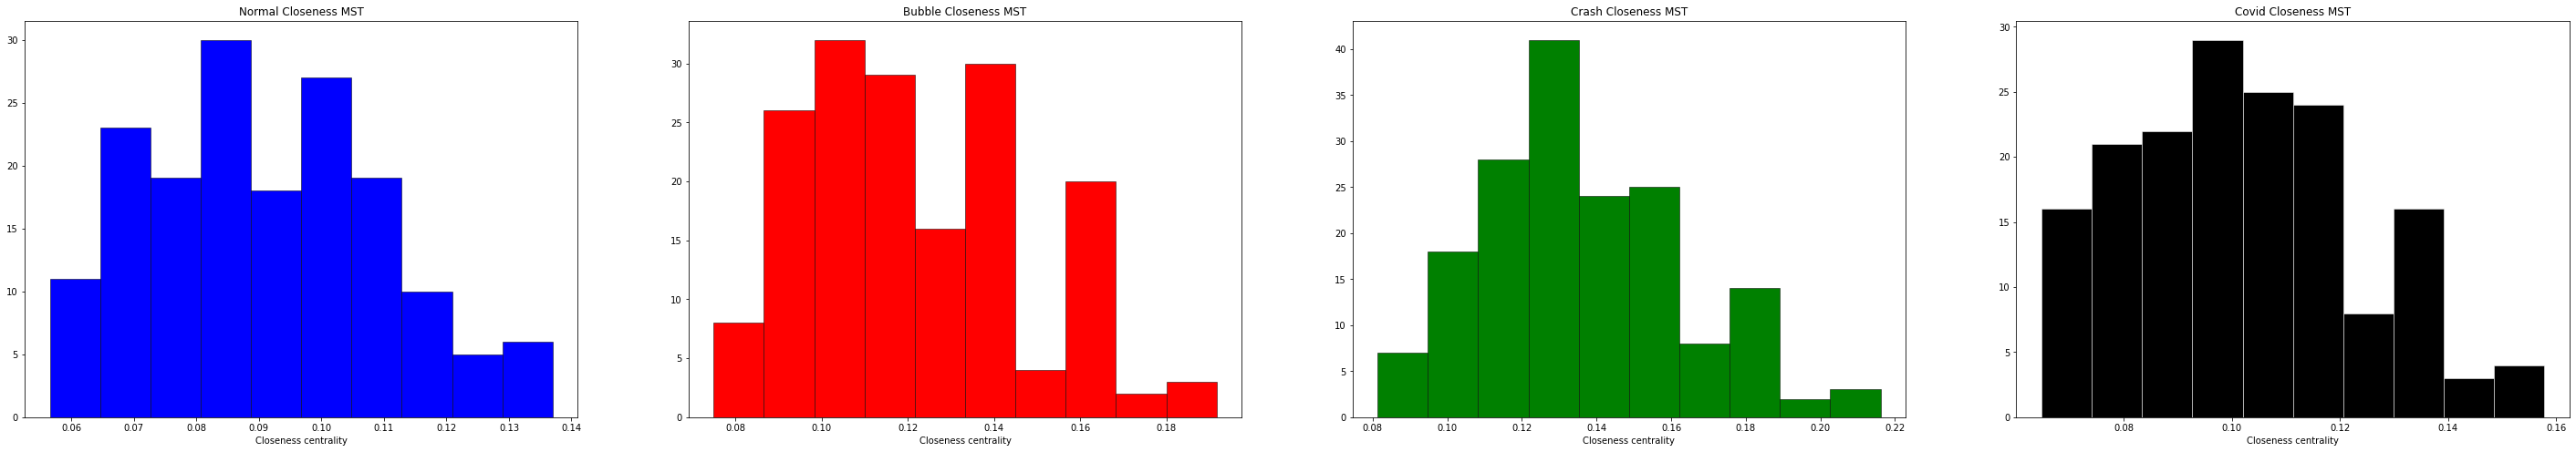

In [66]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(50, 8))
ax1.hist(closeness_normal.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Normal Closeness MST')
ax1.set_xlabel('Closeness centrality')
ax2.hist(closeness_bubble.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Bubble Closeness MST')
ax2.set_xlabel('Closeness centrality')
ax3.hist(closeness_crash.values(),facecolor = 'green', edgecolor='black', linewidth=0.5)
ax3.set_title('Crash Closeness MST')
ax3.set_xlabel('Closeness centrality')
ax4.hist(closeness_covid.values(),facecolor = 'black', edgecolor='white', linewidth=0.5)
ax4.set_title('Covid Closeness MST')
ax4.set_xlabel('Closeness centrality')
plt.savefig("plots\\distribution_closeness_MST.pdf", format="pdf", bbox_inches="tight")
plt.show()

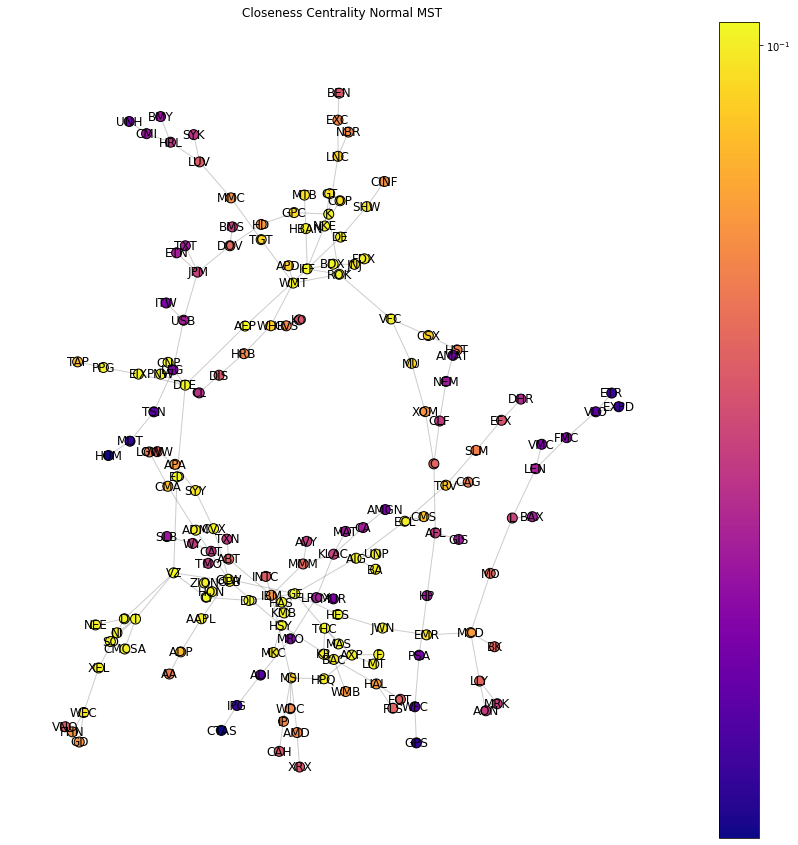

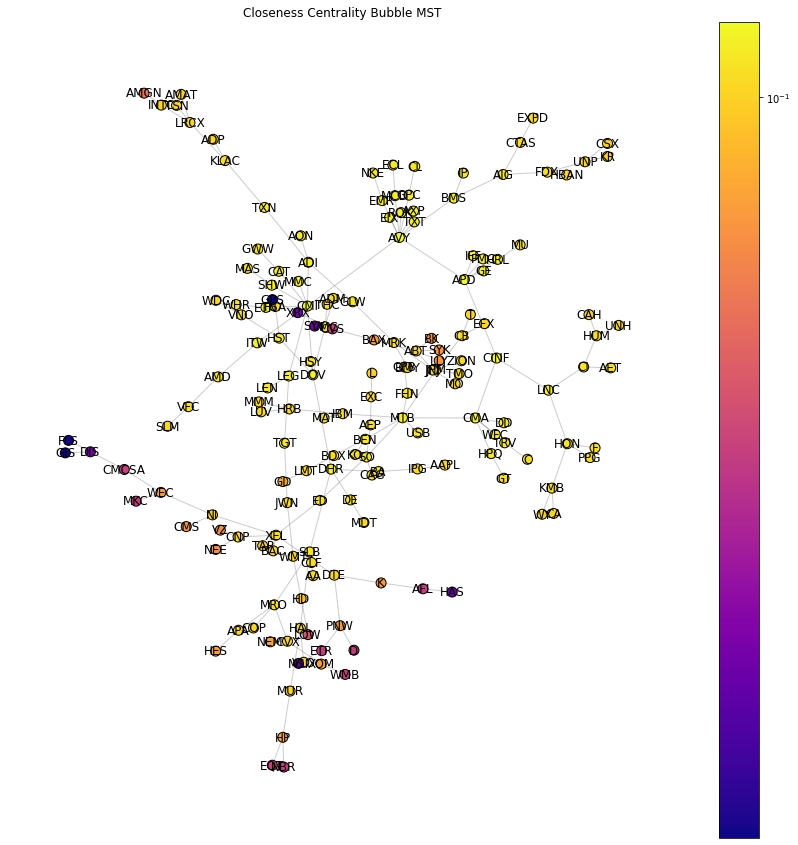

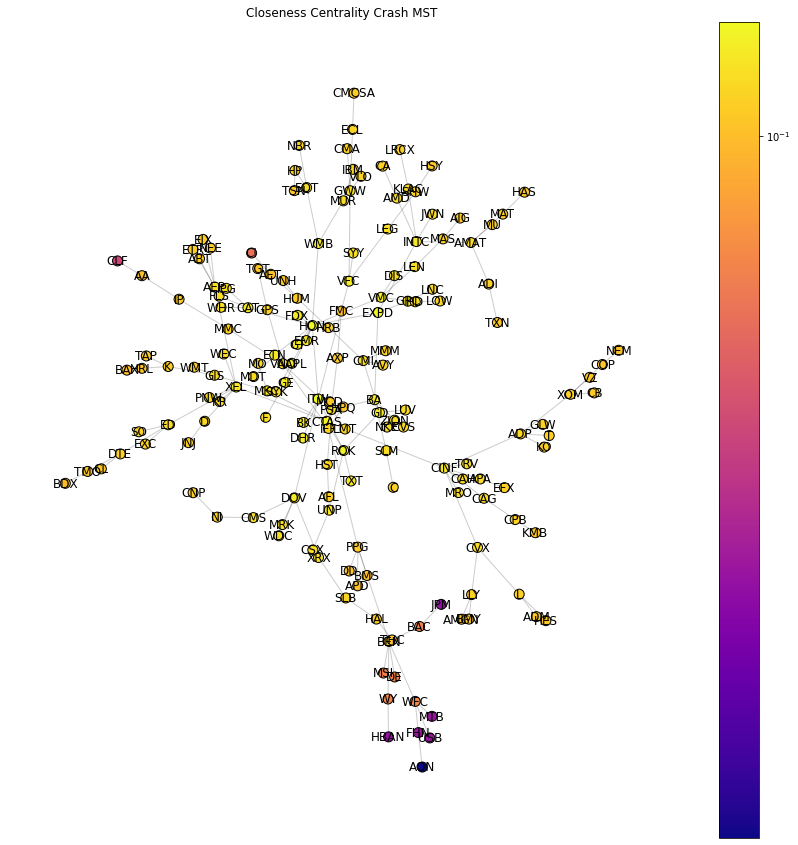

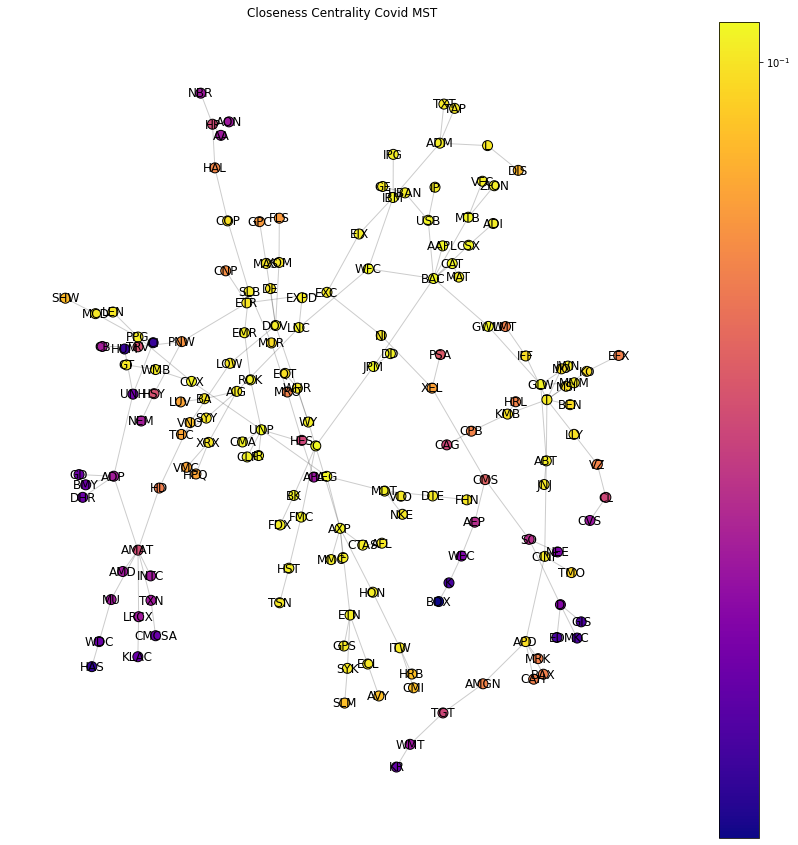

In [67]:
draw_net(list_graph[0], closeness_normal, 'Closeness Centrality Normal MST')
draw_net(list_graph[1], closeness_bubble, 'Closeness Centrality Bubble MST')
draw_net(list_graph[2], closeness_crash, 'Closeness Centrality Crash MST')
draw_net(list_graph[3], closeness_covid, 'Closeness Centrality Covid MST')

### Betweenness Centrality

In [15]:
betweenness_normal = nx.betweenness_centrality(list_graph[0])
betweenness_bubble = nx.betweenness_centrality(list_graph[1])
betweenness_crash = nx.betweenness_centrality(list_graph[2])
betweenness_covid = nx.betweenness_centrality(list_graph[3])
betweenness_normal = {k: v for k, v in sorted(betweenness_normal.items(), key=lambda item: item[1],reverse=True)}
betweenness_bubble = {k: v for k, v in sorted(betweenness_bubble.items(), key=lambda item: item[1],reverse=True)}
betweenness_crash = {k: v for k, v in sorted(betweenness_crash.items(), key=lambda item: item[1],reverse=True)}
betweenness_covid = {k: v for k, v in sorted(betweenness_covid.items(), key=lambda item: item[1],reverse=True)}

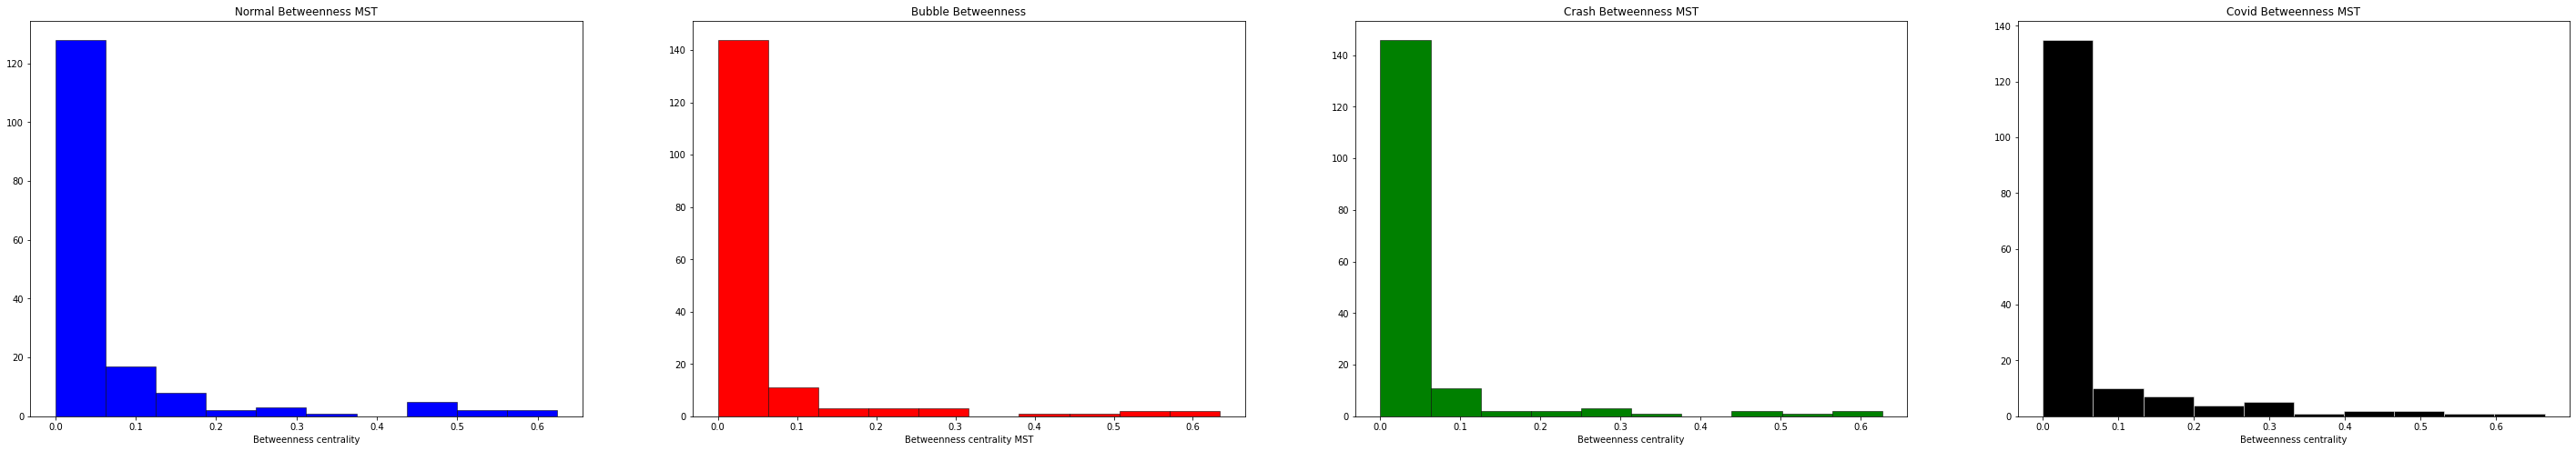

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(50, 8))
ax1.hist(betweenness_normal.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Normal Betweenness MST')
ax1.set_xlabel('Betweenness centrality')
ax2.hist(betweenness_bubble.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Bubble Betweenness')
ax2.set_xlabel('Betweenness centrality MST')
ax3.hist(betweenness_crash.values(),facecolor = 'green', edgecolor='black', linewidth=0.5)
ax3.set_title('Crash Betweenness MST')
ax3.set_xlabel('Betweenness centrality')
ax4.hist(betweenness_covid.values(),facecolor = 'black', edgecolor='white', linewidth=0.5)
ax4.set_title('Covid Betweenness MST')
ax4.set_xlabel('Betweenness centrality')
plt.savefig("plots\\distribution_betweenness_MST.pdf", format="pdf", bbox_inches="tight")
plt.show()

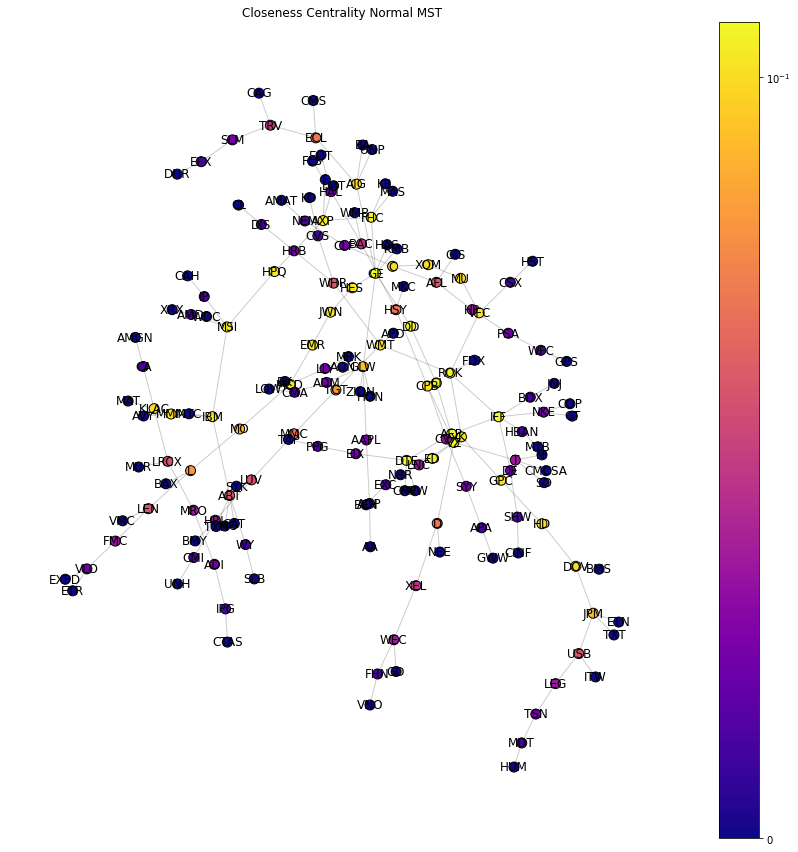

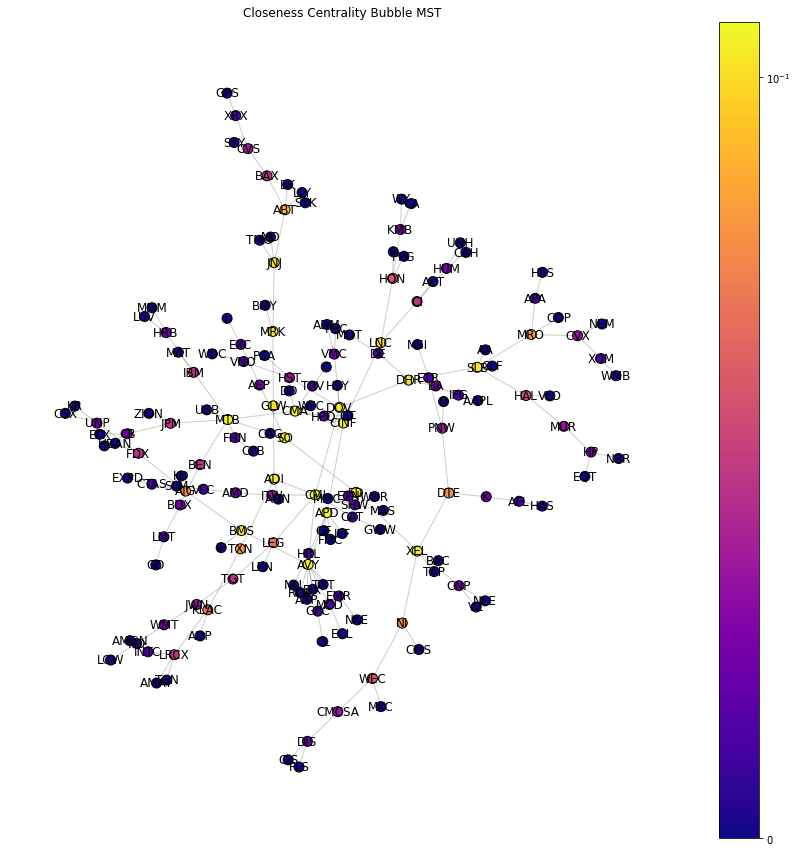

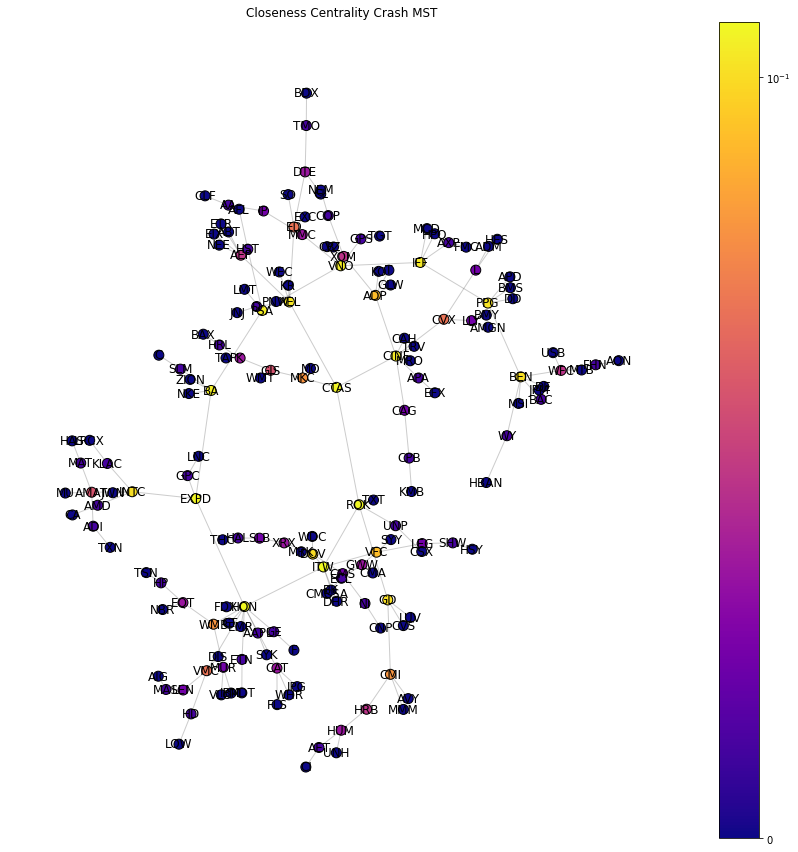

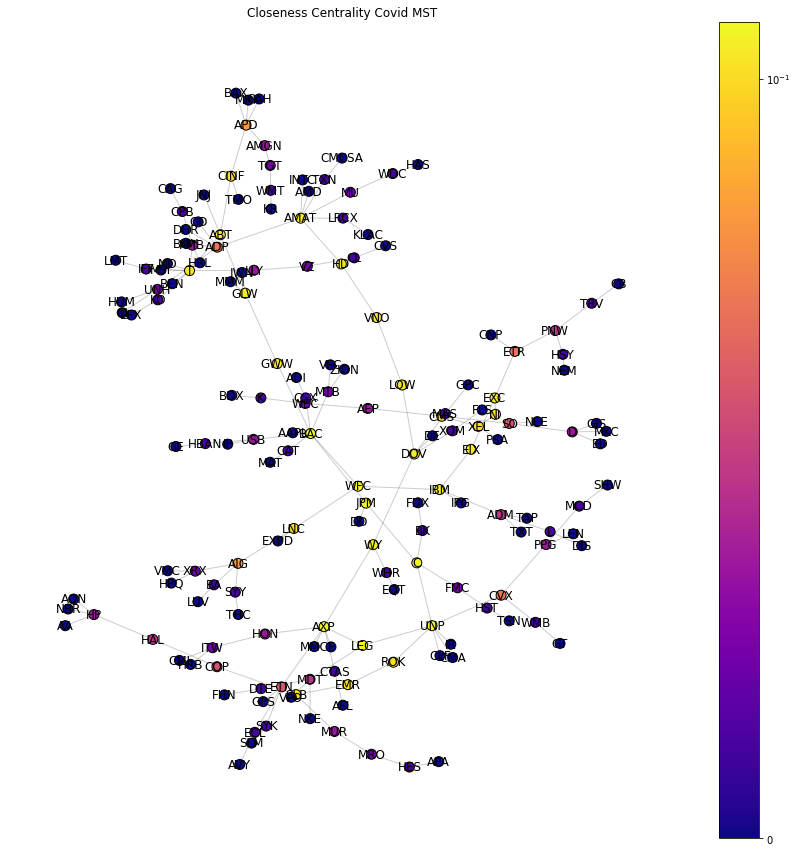

In [70]:
draw_net(list_graph[0], betweenness_normal, 'Closeness Centrality Normal MST')
draw_net(list_graph[1], betweenness_bubble, 'Closeness Centrality Bubble MST')
draw_net(list_graph[2], betweenness_crash, 'Closeness Centrality Crash MST')
draw_net(list_graph[3], betweenness_covid, 'Closeness Centrality Covid MST')

### Harmonic Centrality


In [17]:
harmonic_normal = nx.harmonic_centrality(list_graph[0])
harmonic_bubble = nx.harmonic_centrality(list_graph[1])
harmonic_crash = nx.harmonic_centrality(list_graph[2])
harmonic_covid = nx.harmonic_centrality(list_graph[3])
harmonic_normal = {k: v for k, v in sorted(harmonic_normal.items(), key=lambda item: item[1],reverse=True)}
harmonic_bubble = {k: v for k, v in sorted(harmonic_bubble.items(), key=lambda item: item[1],reverse=True)}
harmonic_crash = {k: v for k, v in sorted(harmonic_crash.items(), key=lambda item: item[1],reverse=True)}
harmonic_covid = {k: v for k, v in sorted(harmonic_covid.items(), key=lambda item: item[1],reverse=True)}

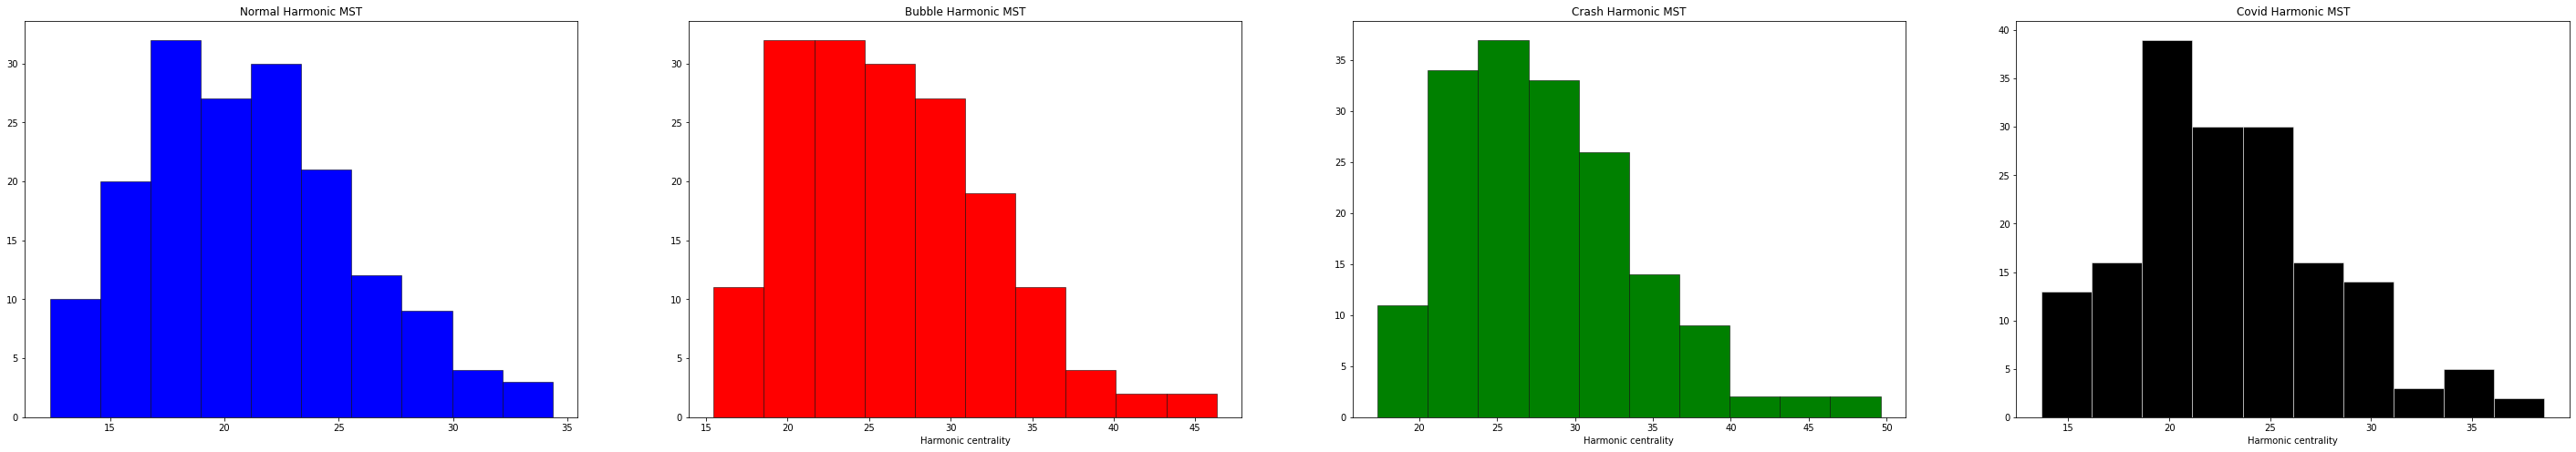

In [18]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(50, 8))
ax1.hist(harmonic_normal.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Normal Harmonic MST')
ax2.set_xlabel('Harmonic centrality')
ax2.hist(harmonic_bubble.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Bubble Harmonic MST')
ax2.set_xlabel('Harmonic centrality')
ax3.hist(harmonic_crash.values(),facecolor = 'green', edgecolor='black', linewidth=0.5)
ax3.set_title('Crash Harmonic MST')
ax3.set_xlabel('Harmonic centrality')
ax4.hist(harmonic_covid.values(),facecolor = 'black', edgecolor='white', linewidth=0.5)
ax4.set_title('Covid Harmonic MST')
ax4.set_xlabel('Harmonic centrality')
plt.savefig("plots\\distribution_harmonic_MST.pdf", format="pdf", bbox_inches="tight")
plt.show()

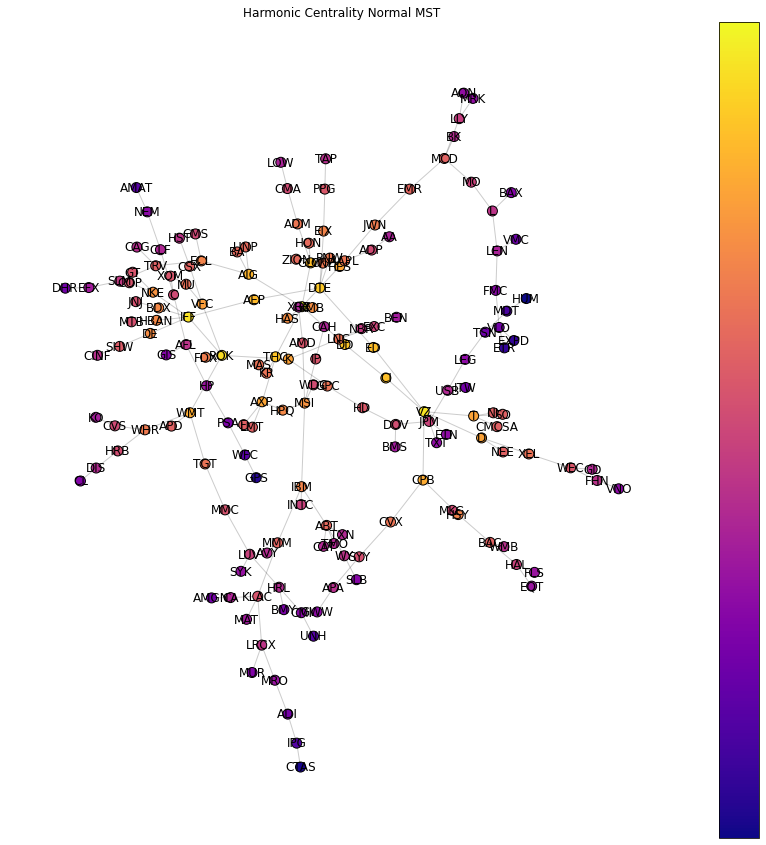

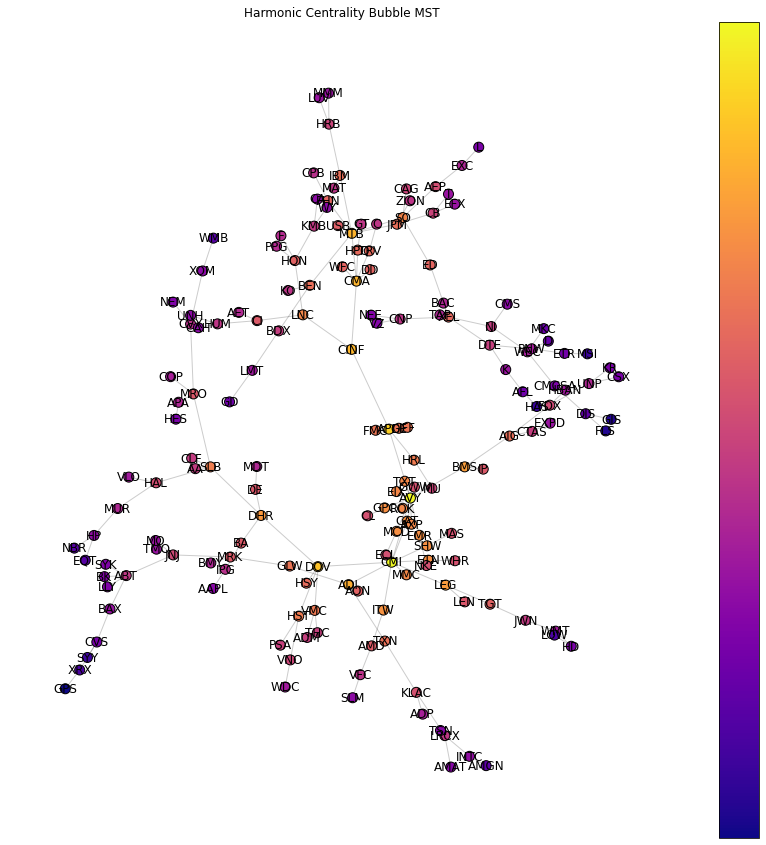

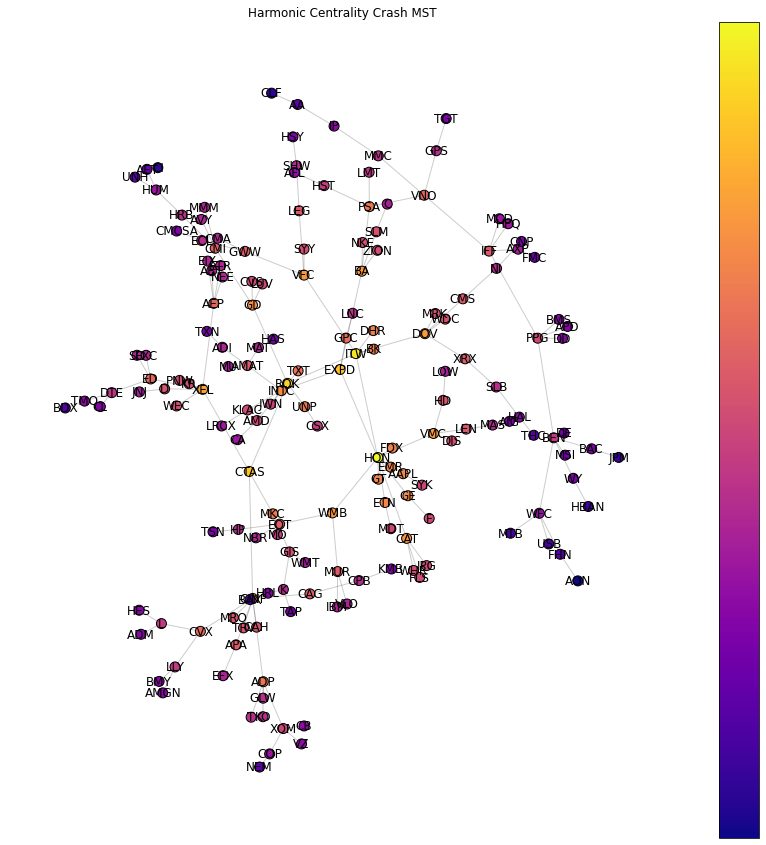

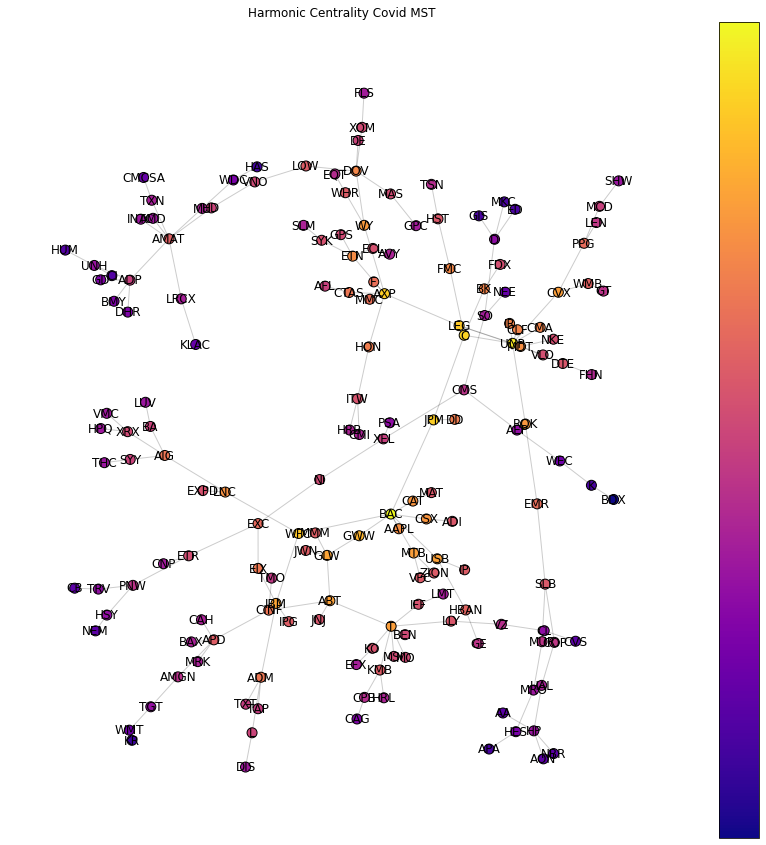

In [73]:
draw_net(list_graph[0], harmonic_normal, 'Harmonic Centrality Normal MST')
draw_net(list_graph[1], harmonic_bubble, 'Harmonic Centrality Bubble MST')
draw_net(list_graph[2], harmonic_crash, 'Harmonic Centrality Crash MST')
draw_net(list_graph[3], harmonic_covid, 'Harmonic Centrality Covid MST')

### Eigenvector

In [19]:
#eigen_normal = nx.eigenvector_centrality(list_graph[0])
eigen_bubble = nx.eigenvector_centrality(list_graph[1])
eigen_crash = nx.eigenvector_centrality(list_graph[2])
#eigen_covid = nx.eigenvector_centrality(list_graph[3])

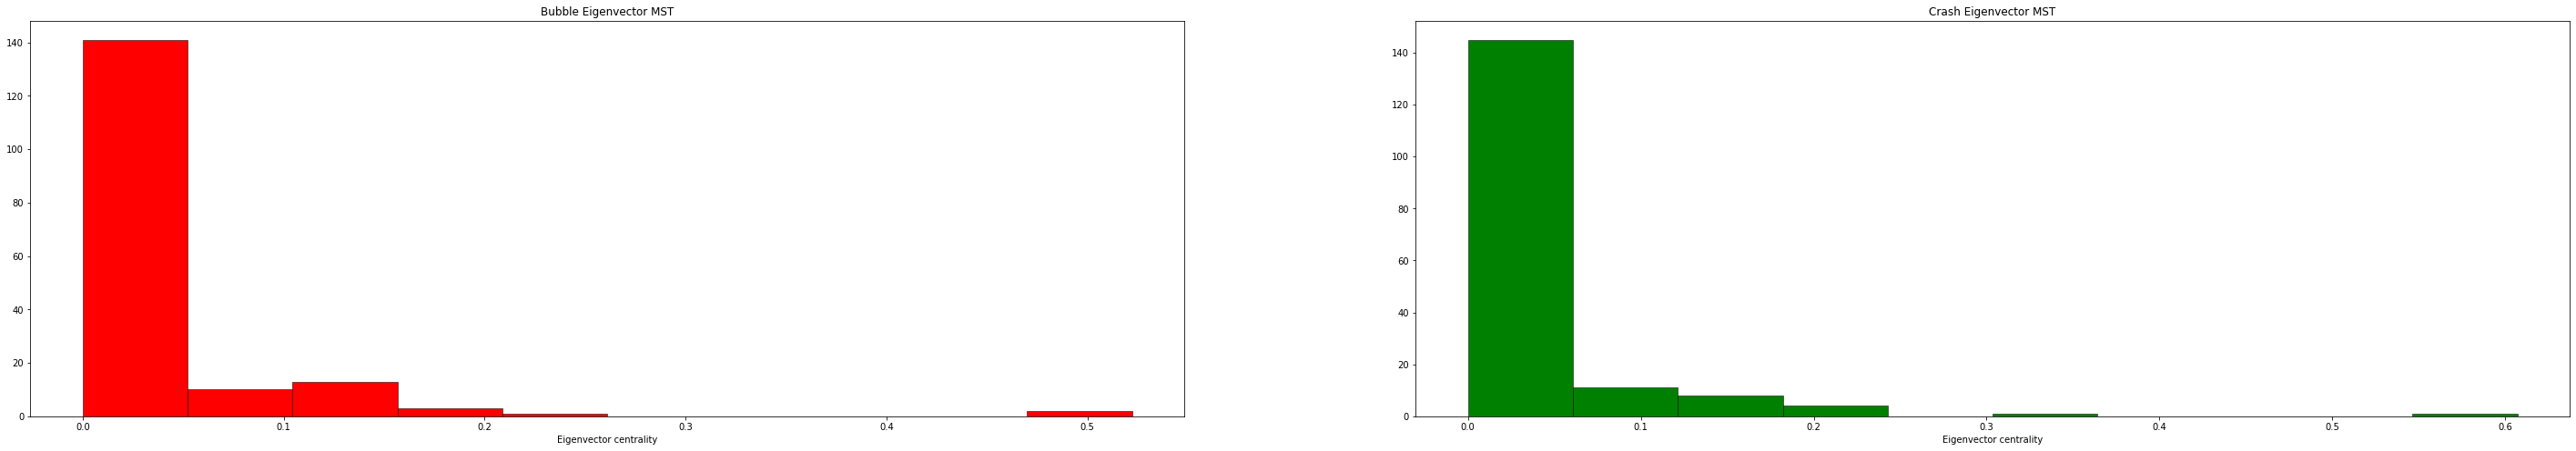

In [20]:
fig, (ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(50, 8))
ax2.hist(eigen_bubble.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Bubble Eigenvector MST')
ax2.set_xlabel('Eigenvector centrality')
ax3.hist(eigen_crash.values(),facecolor = 'green', edgecolor='black', linewidth=0.5)
ax3.set_title('Crash Eigenvector MST')
ax3.set_xlabel('Eigenvector centrality')
plt.savefig("plots\\distribution_eigen_MST.pdf", format="pdf", bbox_inches="tight")
plt.show()

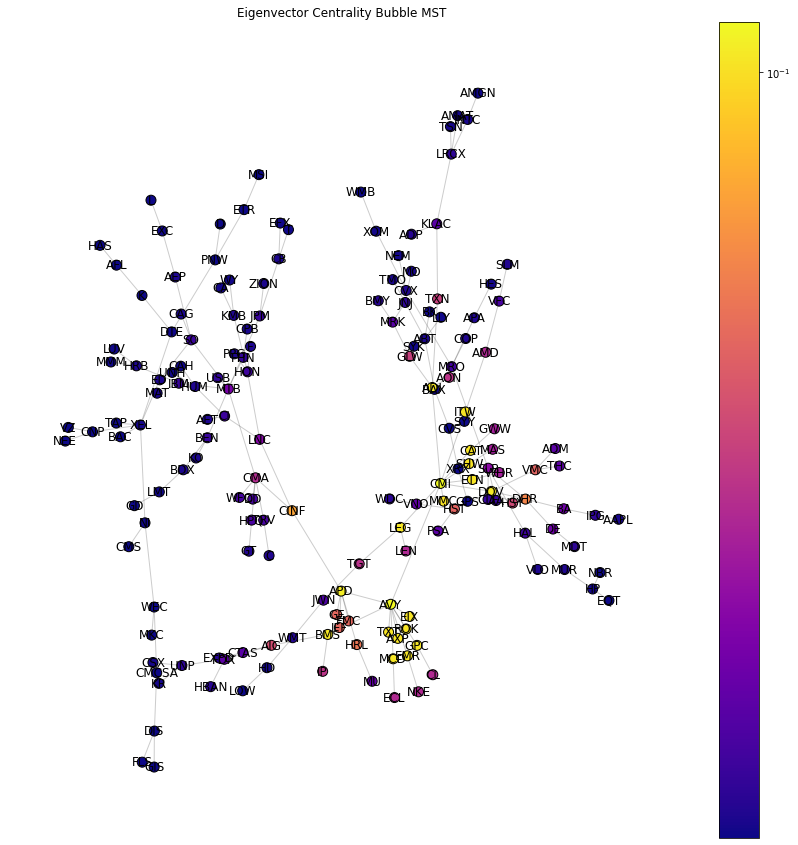

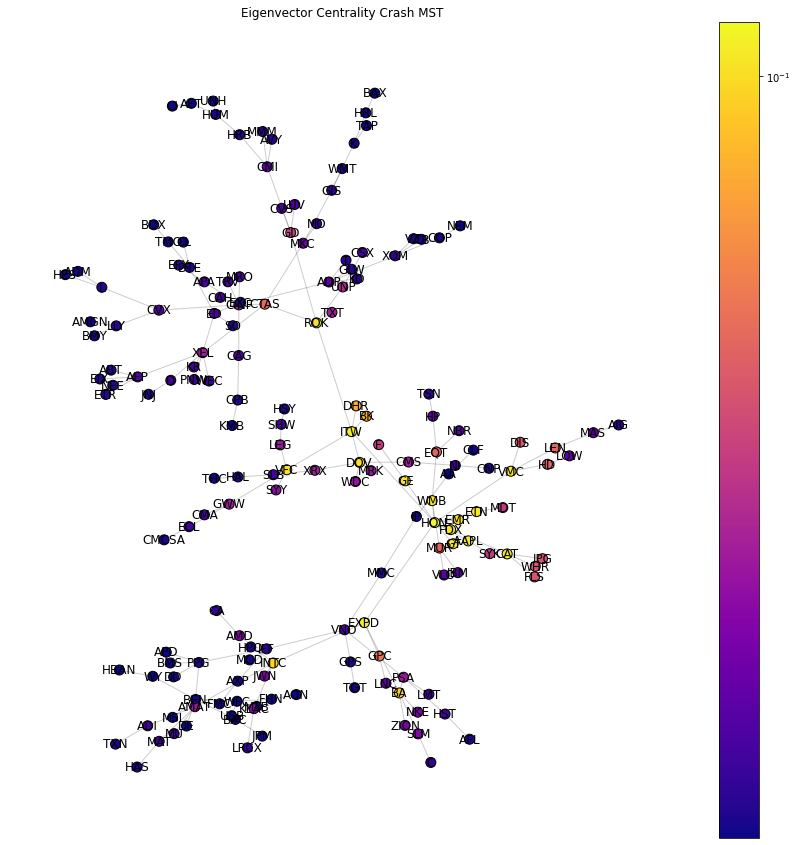

In [78]:
draw_net(list_graph[1], eigen_bubble, 'Eigenvector Centrality Bubble MST')
draw_net(list_graph[2], eigen_crash, 'Eigenvector Centrality Crash MST')

In [21]:
print(f'Normal assortativity:{nx.degree_assortativity_coefficient(list_graph[0]):.2f}' 
      f'\t Bubble assortativity:{nx.degree_assortativity_coefficient(list_graph[1]):.2f}'
      f'\t Crash assortativity:{nx.degree_assortativity_coefficient(list_graph[2]):.2f}'
      f'\t Covid assortativity:{nx.degree_assortativity_coefficient(list_graph[3]):.2f}')

Normal assortativity:-0.15	 Bubble assortativity:-0.09	 Crash assortativity:-0.13	 Covid assortativity:-0.22
